# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q=London&"
city_url = url + "appid=" + weather_api_key

    
# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 276.81,
  'feels_like': 275.46,
  'temp_min': 274.95,
  'temp_max': 278.68,
  'pressure': 1022,
  'humidity': 86},
 'visibility': 10000,
 'wind': {'speed': 1.58, 'deg': 212, 'gust': 3.87},
 'clouds': {'all': 9},
 'dt': 1672681791,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1672646763,
  'sunset': 1672675339},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({'city': city, 
                          'lat': city_lat, 
                          'lng': city_lng, 
                          'max_temp': city_max_temp,
                          'humidity': city_humidity,
                          'cloudiness': city_clouds,
                          'speed': city_wind,
                          'country': city_country,
                          'date': city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | soyo
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | nema
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | chara
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | san ignacio
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | larsnes
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | yerofey pavlovich
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | bethel
Processin

Processing Record 35 of Set 4 | sao filipe
Processing Record 36 of Set 4 | adrar
Processing Record 37 of Set 4 | staroaleyskoye
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | zapolyarnyy
Processing Record 40 of Set 4 | mae sai
Processing Record 41 of Set 4 | port alfred
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | edea
Processing Record 45 of Set 4 | linares
Processing Record 46 of Set 4 | gushikawa
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | zhanaozen
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 0 of Set 5 | bengkulu
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | ola
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | anadyr

Processing Record 29 of Set 8 | meiganga
Processing Record 30 of Set 8 | krasnoselkup
Processing Record 31 of Set 8 | bella union
Processing Record 32 of Set 8 | koupela
Processing Record 33 of Set 8 | sicuani
Processing Record 34 of Set 8 | ambato
Processing Record 35 of Set 8 | mbanza-ngungu
Processing Record 36 of Set 8 | basco
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | sao felix do xingu
Processing Record 40 of Set 8 | tres picos
Processing Record 41 of Set 8 | colares
Processing Record 42 of Set 8 | golden
Processing Record 43 of Set 8 | itoman
Processing Record 44 of Set 8 | havelock
Processing Record 45 of Set 8 | bestobe
Processing Record 46 of Set 8 | zeya
Processing Record 47 of Set 8 | lovozero
Processing Record 48 of Set 8 | manitowoc
Processing Record 49 of Set 8 | isangel
Processing Record 0 of Set 9 | houston
Processing Record 1 of Set 9 | baruun-urt
Processing Record 2 of Set 9 | doha
Processing Record 

Processing Record 15 of Set 12 | beyneu
Processing Record 16 of Set 12 | sur
Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | amahai
Processing Record 19 of Set 12 | gweta
Processing Record 20 of Set 12 | beira
Processing Record 21 of Set 12 | vostok
Processing Record 22 of Set 12 | tateyama
Processing Record 23 of Set 12 | talmenka
Processing Record 24 of Set 12 | ajdabiya
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | kamenka
Processing Record 27 of Set 12 | chachapoyas
Processing Record 28 of Set 12 | leeton
Processing Record 29 of Set 12 | hami
Processing Record 30 of Set 12 | kaputa
Processing Record 31 of Set 12 | campbell river
Processing Record 32 of Set 12 | trairi
Processing Record 33 of Set 12 | salisbury
Processing Record 34 of Set 12 | karamea
City not found. Skipping...
Processing Record 35 of Set 12 | san-pedro
Processing Record 36 of Set 12 | beruni
City not found. Skipping...
Processing Record 37 of Set 12 | tuy hoa


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

city          558
lat           558
lng           558
max_temp      558
humidity      558
cloudiness    558
speed         558
country       558
date          558
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,speed,country,date
0,soyo,12.3689,-6.1349,77.58,82,91,6.42,AO,1672682243
1,qaanaaq,-69.3632,77.4840,-11.04,81,97,2.04,GL,1672682001
2,nema,50.5011,57.5067,21.06,91,99,12.50,RU,1672682244
3,fortuna,-124.1573,40.5982,47.93,77,100,10.36,US,1672682244
4,chara,118.2631,56.9064,-12.62,66,13,1.81,RU,1672682245


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [14]:
# Read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# Display sample data
city_data_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,speed,country,date
City_ID,,,,,,,,,
0,soyo,12.3689,-6.1349,77.58,82,91,6.42,AO,1672682243
1,qaanaaq,-69.3632,77.4840,-11.04,81,97,2.04,GL,1672682001
2,nema,50.5011,57.5067,21.06,91,99,12.50,RU,1672682244
3,fortuna,-124.1573,40.5982,47.93,77,100,10.36,US,1672682244
4,chara,118.2631,56.9064,-12.62,66,13,1.81,RU,1672682245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

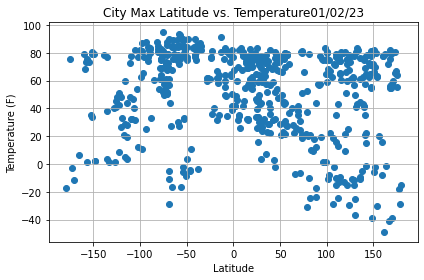

In [26]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["lat"]
y_values = city_data_df["max_temp"]

plt.scatter(city_data_df['lat'],city_data_df['max_temp'])
plt.title('City Max Latitude vs. Temperature'+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

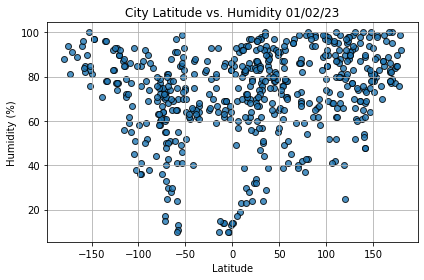

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['lat'],
            city_data_df['humidity'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

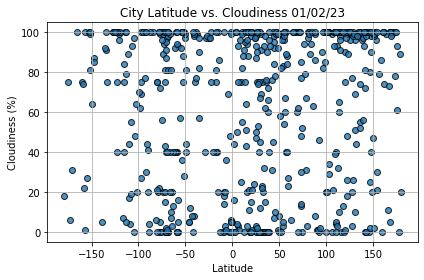

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['lat'],
            city_data_df['cloudiness'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

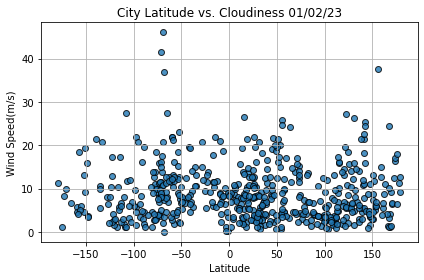

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['lat'],
            city_data_df['speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['lat']).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,speed,country,date
City_ID,,,,,,,,,
0,soyo,12.3689,-6.1349,77.58,82,91,6.42,AO,1672682243
2,nema,50.5011,57.5067,21.06,91,99,12.50,RU,1672682244
4,chara,118.2631,56.9064,-12.62,66,13,1.81,RU,1672682245
5,longyearbyen,15.6401,78.2186,31.84,69,20,26.46,SJ,1672682246
9,new norfolk,147.0587,-42.7826,54.91,64,80,1.63,AU,1672682248


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['lat']).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,speed,country,date
City_ID,,,,,,,,,
1,qaanaaq,-69.3632,77.4840,-11.04,81,97,2.04,GL,1672682001
3,fortuna,-124.1573,40.5982,47.93,77,100,10.36,US,1672682244
6,san ignacio,-89.0714,17.1561,82.54,74,0,4.61,BZ,1672682247
7,torbay,-52.7314,47.6666,32.58,89,100,23.02,CA,1672682247
8,cockburn town,-71.1419,21.4612,78.76,73,40,11.50,TC,1672682248


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.18876842813903885


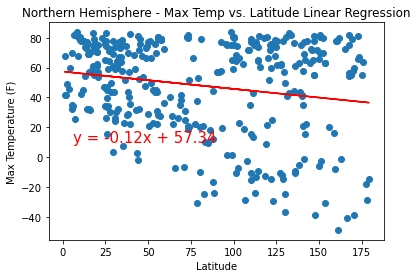

The regression displays a slight negative correlation.


In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The regression displays a slight negative correlation.")

The r-value is: 0.2710915428586418


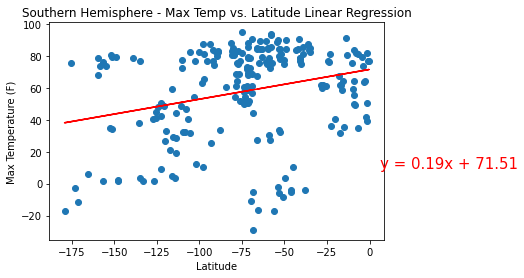

The regression displays a slight positive correlation.


In [73]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")



plt.show()
print("The regression displays a slight positive correlation.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [74]:
print("The weather today has been wide ranging in temperatures in the US. Southern and Midwest states are having unusually warm weather for December and the Western states are showing normal cooler temperaures. This nontypical weather pattern is probably being reflected in the linear regression being seen on this graph.")

The weather today has been wide ranging in temperatures in the US. Southern and Midwest states are having unusually warm weather for December and the Western states are showing normal cooler temperaures. This nontypical weather pattern is probably being reflected in the linear regression being seen on this graph.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17912604390055079


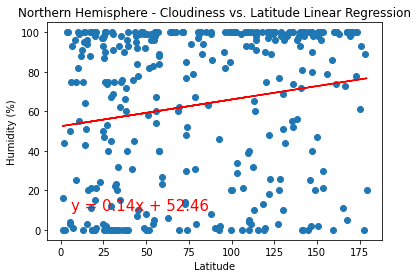

The linear regression does not show a correlation between cloudiness and latitude.


In [75]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The linear regression does not show a correlation between cloudiness and latitude.")

The r-value is: -0.35689182842208295


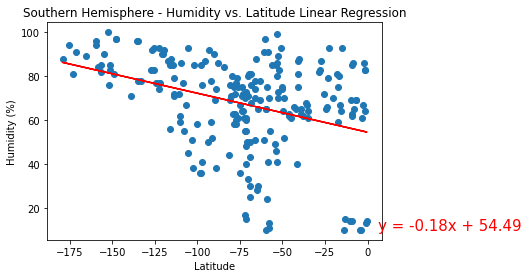

The regression displays a negative correlation.


In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The regression displays a negative correlation.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [84]:
print("The weather today has been wide ranging in temperatures in the Nothern Hempishere. There has been varying temperatures for December. This nontypical weather pattern is probably being reflected in the linear regression being seen on the Nothern hemisphere graph.  The Southern Hemisphere is in its summer season so its showing a correlation between humidity and latitude.")

The weather today has been wide ranging in temperatures in the Nothern Hempishere. There has been varying temperatures for December. This nontypical weather pattern is probably being reflected in the linear regression being seen on the Nothern hemisphere graph.  The Southern Hemisphere is in its summer season so its showing a correlation between humidity and latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17912604390055079


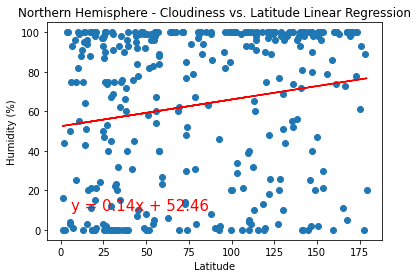

The linear regression does not show a correlation between cloudiness and latitude.


In [78]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The linear regression does not show a correlation between cloudiness and latitude.")

The r-value is: -0.35689182842208295


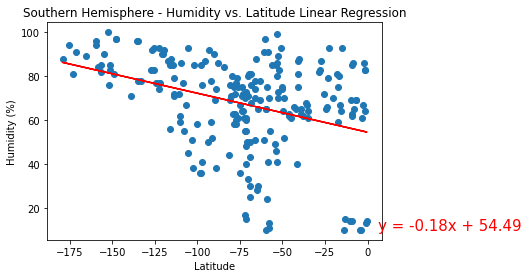

The regression displays a negative correlation for humidity and latitude in the southern hemisphere.


In [86]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")



plt.show()
print("The regression displays a negative correlation for humidity and latitude in the southern hemisphere.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.025681921679203377


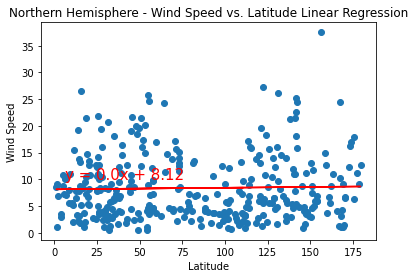

The linear regression does not show any correlation between cloudiness and latitude.


In [82]:
# Northern Hemisphere
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The linear regression does not show any correlation between cloudiness and latitude.")

The r-value is: 0.08189634023728774


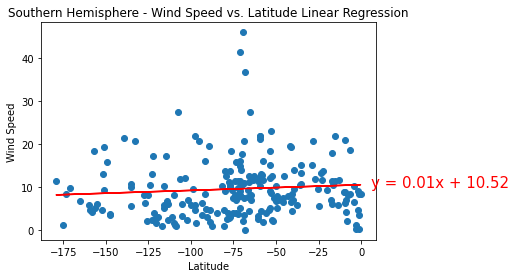

The linear regression does not show any correlation between cloudiness and latitude.


In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")


plt.show()
print("The linear regression does not show any correlation between cloudiness and latitude.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
print("Both northern and southern hemisphere linear regressions does not show any correlation between cloudiness and latitude.")